# **Implementing MLP with Keras**

# **1st Run**
*   **Layers:** Three hidden layers.
*   **Number of Neurons:** 50 neurons in each hidden layer.
*   **Activation Function:** Rectified Linear Unit (ReLU) activation function for each hidden layer. No activation function for the output layer (typical for regression tasks).
*   **Optimizer:** Adam optimizer.
*   **Learning Rate:** Learning rate is set to 0.001 for the Adam optimizer.

**Result**
*   **RMSE:** 0.5029911733388032



In [18]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Set seed for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Load the California housing dataset
housing = fetch_california_housing()

# Split the dataset into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

# Further split the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Create a Keras Sequential model
model = Sequential([
    Dense(50, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model on the training data
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid), verbose=1)

# Make predictions on the validation set
y_pred = model.predict(X_valid_scaled).flatten()

# Calculate the Root Mean Squared Error (RMSE) between the predicted and actual values
rmse = mean_squared_error(y_valid, y_pred, squared=False)

# Display the RMSE as the result
print("RMSE:", rmse)


Epoch 1/50
363/363 [==============================] - 2s 3ms/step - loss: 0.8005 - val_loss: 0.4382
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3753 - val_loss: 2.4872
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3699 - val_loss: 0.3333
Epoch 4/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3344 - val_loss: 0.8659
Epoch 5/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3196 - val_loss: 1.8073
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3193 - val_loss: 0.6111
Epoch 7/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3069 - val_loss: 1.1770
Epoch 8/50
363/363 [==============================] - 1s 3ms/step - loss: 0.2984 - val_loss: 0.6726
Epoch 9/50
363/363 [==============================] - 1s 2ms/step - loss: 0.2956 - val_loss: 0.5357
Epoch 10/50
363/363 [==============================] - 1s 2ms/step - loss: 0.2885 - val_loss: 0.3157

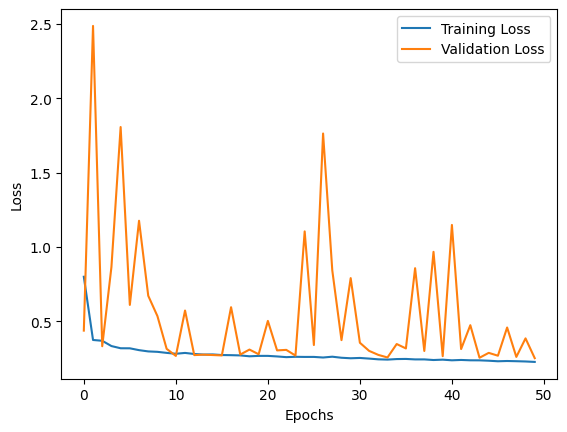

In [19]:
# Extract loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Display the loss values over epochs
import matplotlib.pyplot as plt

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **2nd Run**
*   **Layers:** Three hidden layers.
*   **Number of Neurons:** 50 neurons in each hidden layer.
*   **Activation Function:** Rectified Linear Unit (ReLU) activation function for each hidden layer. No activation function for the output layer (typical for regression tasks).
*   **Optimizer:** SGD optimizer.
*   **Learning Rate:** Learning rate is set to 0.01 for the SGD optimizer.

**Result**
*   **RMSE:** 0.5247694308905388



In [20]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Set seed for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Load the California housing dataset
housing = fetch_california_housing()

# Split the dataset into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

# Further split the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Create a Keras Sequential model
model = Sequential([
    Dense(50, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')

# Train the model on the training data
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid), verbose=1)

# Make predictions on the validation set
y_pred = model.predict(X_valid_scaled).flatten()

# Calculate the Root Mean Squared Error (RMSE) between the predicted and actual values
rmse = mean_squared_error(y_valid, y_pred, squared=False)

# Display the RMSE as the result
print("RMSE:", rmse)


Epoch 1/50
363/363 [==============================] - 2s 4ms/step - loss: 0.6219 - val_loss: 0.7263
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3977 - val_loss: 1.1787
Epoch 3/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3834 - val_loss: 0.3428
Epoch 4/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3582 - val_loss: 0.3576
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3513 - val_loss: 0.3303
Epoch 6/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3439 - val_loss: 0.3879
Epoch 7/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3427 - val_loss: 0.3242
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3349 - val_loss: 0.3390
Epoch 9/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3283 - val_loss: 0.3234
Epoch 10/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3244 - val_loss: 0.4035

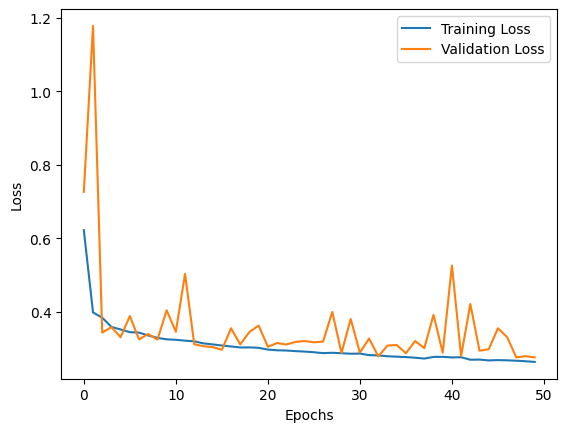

In [21]:
# Extract loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Display the loss values over epochs
import matplotlib.pyplot as plt

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **3rd Run**
*   **Layers:** Three hidden layers.
*   **Number of Neurons:** 100 neurons in each hidden layer.
*   **Activation Function:** Rectified Linear Unit (ReLU) activation function for each hidden layer. No activation function for the output layer (typical for regression tasks).
*   **Optimizer:** Adam optimizer.
*   **Learning Rate:** Learning rate is set to 0.001 for the Adam optimizer.

**Result**
*   **RMSE:** 0.5568987189052884


In [22]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Set seed for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Load the California housing dataset
housing = fetch_california_housing()

# Split the dataset into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

# Further split the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Create a Keras Sequential model
model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model on the training data
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid), verbose=1)

# Make predictions on the validation set
y_pred = model.predict(X_valid_scaled).flatten()

# Calculate the Root Mean Squared Error (RMSE) between the predicted and actual values
rmse = mean_squared_error(y_valid, y_pred, squared=False)

# Display the RMSE as the result
print("RMSE:", rmse)


Epoch 1/50
363/363 [==============================] - 2s 3ms/step - loss: 0.7908 - val_loss: 0.7636
Epoch 2/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3720 - val_loss: 0.7838
Epoch 3/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3505 - val_loss: 0.4518
Epoch 4/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3368 - val_loss: 0.7654
Epoch 5/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3208 - val_loss: 0.4416
Epoch 6/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3084 - val_loss: 1.2284
Epoch 7/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3158 - val_loss: 0.2974
Epoch 8/50
363/363 [==============================] - 1s 4ms/step - loss: 0.2952 - val_loss: 0.8287
Epoch 9/50
363/363 [==============================] - 1s 4ms/step - loss: 0.2902 - val_loss: 0.3437
Epoch 10/50
363/363 [==============================] - 1s 4ms/step - loss: 0.2837 - val_loss: 1.4905

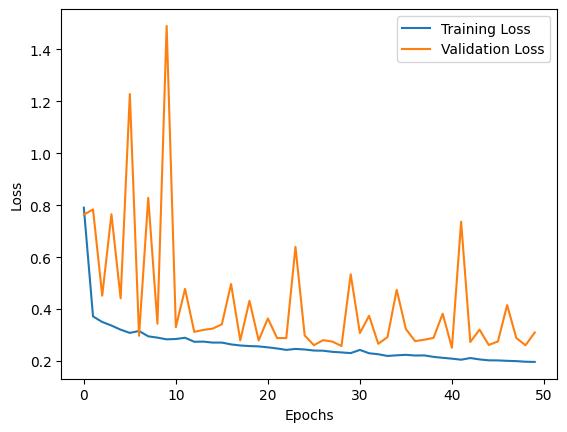

In [23]:
# Extract loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Display the loss values over epochs
import matplotlib.pyplot as plt

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **4th Run**
*   **Layers:** Three hidden layers.
*   **Number of Neurons:** 100 neurons in each hidden layer.
*   **Activation Function:** Rectified Linear Unit (ReLU) activation function for each hidden layer. No activation function for the output layer (typical for regression tasks).
*   **Optimizer:** SGD optimizer.
*   **Learning Rate:** Learning rate is set to 0.01 for the SGD optimizer.

**Result**
*   **RMSE:** 0.5065540086274268


In [24]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Set seed for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Load the California housing dataset
housing = fetch_california_housing()

# Split the dataset into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

# Further split the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Create a Keras Sequential model
model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')

# Train the model on the training data
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid), verbose=1)

# Make predictions on the validation set
y_pred = model.predict(X_valid_scaled).flatten()

# Calculate the Root Mean Squared Error (RMSE) between the predicted and actual values
rmse = mean_squared_error(y_valid, y_pred, squared=False)

# Display the RMSE as the result
print("RMSE:", rmse)


Epoch 1/50
363/363 [==============================] - 1s 3ms/step - loss: 0.6769 - val_loss: 2.2265
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4197 - val_loss: 4.6885
Epoch 3/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4276 - val_loss: 0.5377
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3644 - val_loss: 1.4013
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3527 - val_loss: 2.5780
Epoch 6/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3662 - val_loss: 0.6945
Epoch 7/50
363/363 [==============================] - 1s 4ms/step - loss: 0.3411 - val_loss: 0.5250
Epoch 8/50
363/363 [==============================] - 1s 4ms/step - loss: 0.3310 - val_loss: 0.3407
Epoch 9/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3242 - val_loss: 0.3592
Epoch 10/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3186 - val_loss: 0.3910

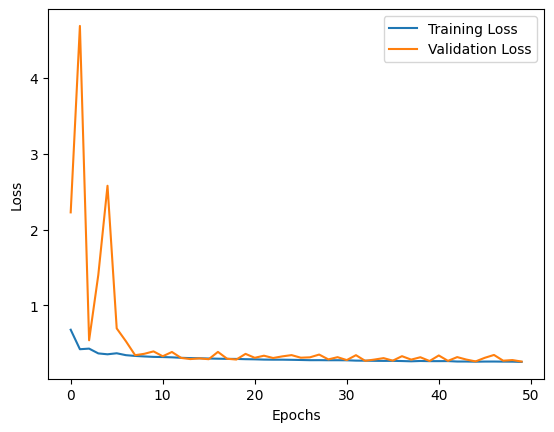

In [25]:
# Extract loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Display the loss values over epochs
import matplotlib.pyplot as plt

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()